## Group Member
### Han Lu
### Jing Hao
### Wenbin Lu

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Loading the Data

In [2]:
data = pd.read_csv("income_data.csv",sep=r'\s*,\s*', engine='python')
data_origin = data
for i in range(len(data["income"])):
    if data["income"][i] == "<=50K":
        data.loc[i:i,"income"] = 0
    else:
        data.loc[i:i,"income"] = 1
data.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


## 1. Visualization & Relationship between variables

In [3]:
dict_mar_sex_male = {}
dict_mar_sex_female = {}
for i in list(data["marital-status"].unique()):
    dict_mar_sex_male[i + "_male_num"] = data[(data["sex"]=="Male")& (data["marital-status"]==i)].shape[0]
    dict_mar_sex_female[i + "_female_num"] = data[(data["sex"]=="Female")& (data["marital-status"]==i)].shape[0]

In [4]:
sex_mar_male_list = []
sex_mar_female_list = []
sex_mar_name_list = []
for key,value in dict_mar_sex_male.items():
    sex_mar_male_list.append(value)
    sex_mar_name_list.append(key)
for key,value in dict_mar_sex_female.items():
    sex_mar_female_list.append(value)

(0, 18000)

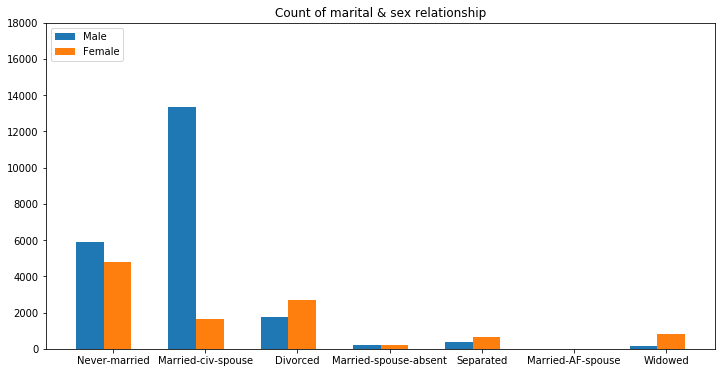

In [5]:
# Count of marital & sex relationship
plt.figure(figsize=(12,6))

width = 0.3
x_pos = [1,2,3,4,5,6,7]
plt.bar(x_pos,sex_mar_male_list,width=0.3)
plt.bar([i + width for i in x_pos],sex_mar_female_list,width=0.3)
plt.legend(['Male', 'Female'], loc='upper left')
plt.xticks([0.25 + i for i in x_pos],list(data["marital-status"].unique()))
plt.title("Count of marital & sex relationship")
#plt.xlim([0.5,3])
plt.ylim([0,18000])

In [6]:
hrs_male_median = data["hours-per-week"][(data["sex"]=="Male")].median()
hrs_female_median = data["hours-per-week"][(data["sex"]=="Female")].median()
edu_male_median = data["education-num"][(data["sex"]=="Male")].median()
edu_female_median = data["education-num"][(data["sex"]=="Female")].median()

viz_male_median = [hrs_male_median,edu_male_median]
viz_female_median = [hrs_female_median,edu_female_median]

In [7]:
hrs_male_mean = data["hours-per-week"][(data["sex"]=="Male")].mean()
hrs_female_mean = data["hours-per-week"][(data["sex"]=="Female")].mean()
edu_male_mean = data["education-num"][(data["sex"]=="Male")].mean()
edu_female_mean = data["education-num"][(data["sex"]=="Female")].mean()
income_male_mean = data[(data['sex']=="Male")]["income"].mean() *100
income_female_mean = data[(data['sex']=="Female")]["income"].mean() * 100
viz_male_mean = [hrs_male_mean,edu_male_mean,income_male_mean]
viz_female_mean = [hrs_female_mean,edu_female_mean,income_female_mean]

(0, 60)

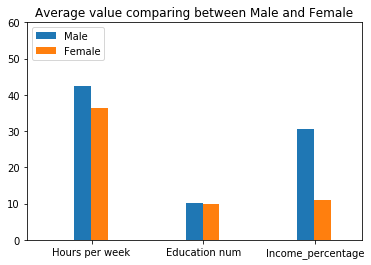

In [8]:
# Mean value comparing between male & female
width = 0.15
x_pox = [1,2,3]
plt.bar(x_pox,viz_male_mean,width=0.15)
plt.bar([i + width for i in x_pox],viz_female_mean,width=0.15)
plt.legend(['Male', 'Female'], loc='upper left')
plt.xticks([1.08,2.08,3.08],['Hours per week','Education num',"Income_percentage"])
plt.title("Average value comparing between Male and Female")
plt.xlim([0.5,3.5])
plt.ylim([0,60])

(0, 60)

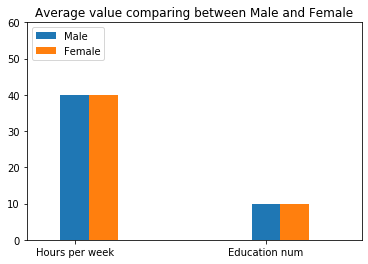

In [9]:
# Median value comparing between male & female

width = 0.15
x_pox = [1,2]
plt.bar(x_pox,viz_male_median,width=0.15)
plt.bar([i + width for i in x_pox],viz_female_median,width=0.15)
plt.legend(['Male', 'Female'], loc='upper left')
plt.xticks([1,2],['Hours per week','Education num'])
plt.title("Average value comparing between Male and Female")
plt.xlim([0.75,2.5])
plt.ylim([0,60])

In [10]:
# Value for cap-gain & cap-loss
cap_gain_male_mean = data["capital-gain"][(data["sex"]=="Male")].mean()
cap_gain_female_mean = data["capital-gain"][(data["sex"]=="Female")].mean()
cap_gain_male_90 = np.quantile(data["capital-gain"][(data["sex"]=="Male")],0.95)
cap_gain_female_90 = np.quantile(data["capital-gain"][(data["sex"]=="Female")],0.95)
cap_loss_male_mean = data["capital-loss"][(data["sex"]=="Male")].mean()
cap_loss_female_mean = data["capital-loss"][(data["sex"]=="Female")].mean()
cap_loss_male_90 = np.quantile(data["capital-loss"][(data["sex"]=="Male")],0.95)
cap_loss_female_90 = np.quantile(data["capital-loss"][(data["sex"]=="Female")],0.95)

viz_gain_male = [cap_gain_male_mean,cap_gain_male_90,cap_loss_male_mean,cap_loss_male_90]
viz_gain_female = [cap_gain_female_mean,cap_gain_female_90,cap_loss_female_mean,cap_loss_female_90]

In [11]:
viz_gain_male

[1329.3700780174393, 7298.0, 100.21330885727397, 1485.0]

Text(0.5, 1.0, 'Capital gain & loss between male and female')

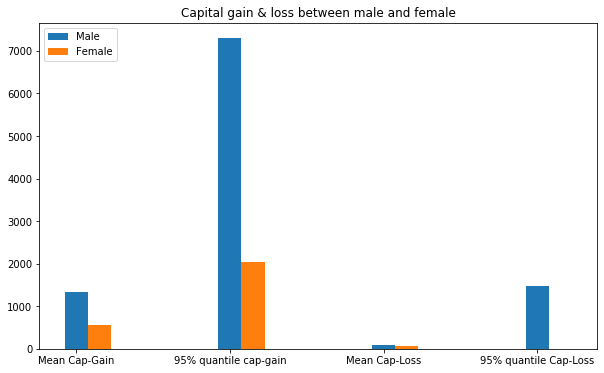

In [12]:
# 90% quantile is zero
plt.figure(figsize=(10,6))
width = 0.3
x_pox = [1,3,5,7]
plt.bar(x_pox,viz_gain_male,width=0.3)
plt.bar([i + width for i in x_pox],viz_gain_female,width=0.3)
plt.legend(['Male', 'Female'], loc='upper left')
plt.xticks([1,3,5,7],['Mean Cap-Gain','95% quantile cap-gain','Mean Cap-Loss','95% quantile Cap-Loss'])
plt.title("Capital gain & loss between male and female")
#plt.xlim([0.5,3])
#plt.ylim([0,1800])

## 2. Transform categorical variables

### Transform the variable into less-level category to avoid overfitting problem

In [13]:
data.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


### Transform the high-level categorical variables into lower level ones

In [14]:
data_transform = data
def education_transform(x):
    if x in ["Preschool","1st-4th","5th-6th","7th-8th"]:
        x = "lower_edu"
    elif x in ["7th-8th","9th","10th","11th","12th","HS-grad","some-college"]:
        x = "mid_edu"
    elif x in ["Bachelors","Doctorate","Prof-school","Assoc-voc","Assoc-acdm"]:
        x = "high_edu"
    return x
data_transform["education"] = data_transform["education"].apply(education_transform)

def workclass_transform(x):
    if x in ["?","Without-pay","Never-worked","Self-emp-inc"]:
        x = "Other"
    elif x in ["Local-gov","State-gov","Federal-gov",""]:
        x = "gov"
    return x
data_transform["workclass"] = data_transform["workclass"].apply(workclass_transform)

def marital_transform(x):
    if x in ["Divorced","Separated","Widowed"]:
        x = "Separated"
    elif x in ["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"]:
        x = "Married"
    return x
data_transform["marital-status"] = data_transform["marital-status"].apply(marital_transform)

def occupation_transform(x):
    if x in ["?","Other-service","Armed-Forces","Priv-house-serv"]:
        x = "Other"
    return x
data_transform["occupation"] = data_transform["occupation"].apply(occupation_transform)

def country_transform(x):
    if x not in ["United-States","Mexico"]:
        x = "Other"
    return x
data_transform["native-country"] = data_transform["native-country"].apply(country_transform)


### Transform the categorical variable into indicator variables

In [15]:
new_column_transform = []
for i in data_transform.columns:
    i = i.replace("-","_")
    new_column_transform.append(i)
data_transform.columns = new_column_transform

In [16]:
data_dummy = data_transform

In [17]:
data_dummy.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,gov,77516,high_edu,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


In [18]:
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["workclass"],prefix="workclass")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["education"],prefix="education")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["marital_status"],prefix="marital_status")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["occupation"],prefix="occupation")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["relationship"],prefix="relationship")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["race"],prefix="race")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["sex"],prefix="sex")],axis=1)
data_dummy = pd.concat([data_dummy,pd.get_dummies(data_transform["native_country"],prefix="native_country")],axis=1)
data_dummy.drop(["workclass","education","marital_status", \
                 "occupation","relationship","race","sex","native_country"],axis=1,inplace=True)


In [19]:
data_dummy.head(1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Other,workclass_Private,workclass_Self-emp-not-inc,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Mexico,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [20]:
data_dummy_scale = data_dummy
for i in range(len(data_dummy_scale)):
    data_dummy_scale.loc[i:i,"age"] = (data_dummy_scale.loc[i:i,"age"] - data_dummy_scale["age"].min()) /(data_dummy_scale["age"].max()-data_dummy_scale["age"].min())
    data_dummy_scale.loc[i:i,"fnlwgt"] = (data_dummy_scale.loc[i:i,"fnlwgt"] - data_dummy_scale["fnlwgt"].min()) /(data_dummy_scale["fnlwgt"].max()-data_dummy_scale["fnlwgt"].min())
    data_dummy_scale.loc[i:i,"capital_gain"] = (data_dummy_scale.loc[i:i,"capital_gain"] - data_dummy_scale["capital_gain"].min()) /(data_dummy_scale["capital_gain"].max()-data_dummy_scale["capital_gain"].min())
    data_dummy_scale.loc[i:i,"capital_loss"] = (data_dummy_scale.loc[i:i,"capital_loss"] - data_dummy_scale["capital_loss"].min()) /(data_dummy_scale["capital_loss"].max()-data_dummy_scale["capital_loss"].min())
    data_dummy_scale.loc[i:i,"education_num"] = (data_dummy_scale.loc[i:i,"education_num"] - data_dummy_scale["education_num"].min()) /(data_dummy_scale["education_num"].max()-data_dummy_scale["education_num"].min())
    

KeyboardInterrupt: 

## 3. Eliminate the variables

### Use RFE to eliminate the variables

In [21]:
factors = data_transform.columns
data_factor = data_transform.copy()
mapping_levels = []
for factor in factors:
    data_factor[factor] = data_factor[factor].factorize(sort = True)[0]
    mapping_levels.append(data_factor[factor].factorize(sort = True)[1])
data_factor.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,22,3,2671,2,12,1,0,1,4,1,25,0,39,2,0
1,33,2,2926,2,12,0,2,0,4,1,0,0,12,2,0
2,21,1,14086,4,8,2,4,1,4,1,0,0,39,2,0
3,36,1,15336,4,6,0,4,0,2,1,0,0,39,2,0
4,11,1,19355,2,12,0,7,5,2,0,0,0,39,1,0


In [ ]:
data_factor_scale = data_factor
for i in range(len(data_factor_scale)):
    data_factor_scale.loc[i:i,"age"] = (data_factor_scale.loc[i:i,"age"] - data_factor_scale["age"].min()) /(data_factor_scale["age"].max()-data_factor_scale["age"].min())
    data_factor_scale.loc[i:i,"fnlwgt"] = (data_factor_scale.loc[i:i,"fnlwgt"] - data_factor_scale["fnlwgt"].min()) /(data_factor_scale["fnlwgt"].max()-data_factor_scale["fnlwgt"].min())
    data_factor_scale.loc[i:i,"capital_gain"] = (data_factor_scale.loc[i:i,"capital_gain"] - data_factor_scale["capital_gain"].min()) /(data_factor_scale["capital_gain"].max()-data_factor_scale["capital_gain"].min())
    data_factor_scale.loc[i:i,"capital_loss"] = (data_factor_scale.loc[i:i,"capital_loss"] - data_factor_scale["capital_loss"].min()) /(data_factor_scale["capital_loss"].max()-data_factor_scale["capital_loss"].min())
    data_factor_scale.loc[i:i,"education_num"] = (data_factor_scale.loc[i:i,"education_num"] - data_factor_scale["education_num"].min()) /(data_factor_scale["education_num"].max()-data_factor_scale["education_num"].min())

data_factor_scale.info()

In [ ]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_factor.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
cols_3_x = [i for i in data_factor.columns if i not in ["income"]]
data_3_x = data_factor[cols_3_x]
data_3_y = data_factor.loc[:,"income"]
from sklearn.model_selection import train_test_split

train_x_3,test_x_3,train_y_3,test_y_3 \
= train_test_split(data_3_x,data_3_y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

rfe_performance = {}
logreg = LogisticRegression()
for i in [3,4,5,6,7,8,9,10,11,12,13]:
    rfe_model =RFE(logreg,i,1)
    rfe_model.fit(train_x_3, train_y_3)
    rfe_performance[i] = rfe_model.score(test_x_3,test_y_3)

In [ ]:
rfe_performance

In [ ]:
featureNo = []
RFE_accuracy = []

for key,value in rfe_performance.items():
    RFE_accuracy.append(value)
    featureNo.append(key)
    
plt.figure(figsize=(12,6))

plt.bar(featureNo,RFE_accuracy,width=0.3)

In [ ]:
logreg = LogisticRegression()
rfe_model_final = RFE(logreg, 7, 1)
rfe_model_final = rfe_model_final.fit(train_x_3, train_y_3)
data_featureEliminated = data_3_x.loc[:,rfe_model_final.support_]
data_featureEliminated

## 4. Fit a regression model to predict whether income of an individual is more than 50k.
### Use logistic regression

In [ ]:
data_4 = data_dummy_scale

In [ ]:
data_4.head(1)

In [ ]:
cols_x = [i for i in data_4.columns if i not in ["income"]]
data_4_x = data_4[cols_x]
data_4_y = data_4.loc[:,"income"]

### Split train & test dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_x_4,test_x_4,train_y_4,test_y_4 = train_test_split(data_4_x,data_4_y,test_size=0.3)

### Build Logistic Regression Model With All Features

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model_4 = LogisticRegression()
log_model_4.fit(train_x_4,train_y_4)
log_model_4.score(test_x_4,test_y_4)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_y_4,log_model_4.predict(test_x_4)).ravel()
(tn, fp, fn, tp)

In [ ]:
# precision:
tp/(tp+fp)

In [ ]:
from sklearn.metrics import roc_curve
roc_curve(test_y_4,log_model_4.predict(test_x_4))

### Build Logistic Regression Model After RFE

In [ ]:
data_4_xe = data_featureEliminated
data_4_ye = data_4.loc[:,"income"]

In [ ]:
from sklearn.model_selection import train_test_split
train_x_4e,test_x_4e,train_y_4e,test_y_4e = train_test_split(data_4_xe,data_4_ye,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model_4e = LogisticRegression()
log_model_4e.fit(train_x_4e,train_y_4e)
log_model_4e.score(test_x_4e,test_y_4e)

In [ ]:
tn_e, fp_e, fn_e, tp_e = confusion_matrix(test_y_4e,log_model_4e.predict(test_x_4e)).ravel()
(tn_e, fp_e, fn_e, tp_e)

In [ ]:
# precision:
tp_e/(tp_e+fp_e)

## 5. Use the income dataset to regress work hours on the rest of the data.

In [ ]:
data_5 = data_dummy_scale

In [ ]:
data_5.head(1)

In [ ]:
cols_x = [i for i in data_5.columns if i not in ["hours_per_week"]]
data_5_x = data_5[cols_x]
data_5_y = data_5.loc[:,"hours_per_week"]

In [ ]:
train_x_5,test_x_5,train_y_5,test_y_5 = train_test_split(data_5_x,data_5_y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_model_5 = LinearRegression()
reg_model_5.fit(train_x_5,train_y_5)
reg_model_5.score(test_x_5,test_y_5)

### Check the significance of parameters

In [ ]:
import statsmodels.api as sm
# data_5_x_2 = sm.add_constant(data_5_x)
est = sm.OLS(data_5_y, data_5_x)
est2 = est.fit()
print(est2.summary())

### Fit the model with significant variables only

### Deleting only one level of dummy variable

In [ ]:
cols_x_sig = [i for i in data_5_x.columns if i not in ["education_Masters", \
        "education_Some_college","education_high_edu","occupation_Adm_clerical","occupation_Handlers_cleaners"]]
data_5_x_sig = data_5_x[cols_x_sig]
data_5_y_sig = data_5_y

In [ ]:
train_x_5_sig,test_x_5_sig,train_y_5_sig,test_y_5_sig \
= train_test_split(data_5_x_sig,data_5_y_sig,test_size=0.3)

In [ ]:
reg_model_5_sig = LinearRegression()
reg_model_5_sig.fit(train_x_5_sig,train_y_5_sig)
reg_model_5_sig.score(test_x_5_sig,test_y_5_sig)

### Deleting the whole dummy variable

In [ ]:
data_transform.head(1)

In [ ]:
cols_x_sig = [i for i in data_transform.columns if i not in ["hours_per_week","education","occupation"]]
data_5_x_sig_trans = data_transform[cols_x_sig]
data_5_y_sig = data_transform.loc[:,"hours_per_week"]

In [ ]:
data_5_x_sig = pd.concat([data_5_x_sig_trans,pd.get_dummies(data_5_x_sig_trans["workclass"],prefix="workclass")],axis=1)
data_5_x_sig = pd.concat([data_5_x_sig,pd.get_dummies(data_5_x_sig["marital_status"],prefix="marital_status")],axis=1)
data_5_x_sig = pd.concat([data_5_x_sig,pd.get_dummies(data_5_x_sig["relationship"],prefix="relationship")],axis=1)
data_5_x_sig = pd.concat([data_5_x_sig,pd.get_dummies(data_5_x_sig["race"],prefix="race")],axis=1)
data_5_x_sig = pd.concat([data_5_x_sig,pd.get_dummies(data_5_x_sig["sex"],prefix="sex")],axis=1)
data_5_x_sig = pd.concat([data_5_x_sig,pd.get_dummies(data_5_x_sig["native_country"],prefix="native_country")],axis=1)

data_5_x_sig.drop(["workclass","marital_status","relationship", \
                   "race","sex","native_country"],axis=1,inplace=True)


In [ ]:
train_x_5_sig,test_x_5_sig,train_y_5_sig,test_y_5_sig \
= train_test_split(data_5_x_sig,data_5_y_sig,test_size=0.3)

In [ ]:
reg_model_5_sig = LinearRegression()
reg_model_5_sig.fit(train_x_5_sig,train_y_5_sig)
reg_model_5_sig.score(test_x_5_sig,test_y_5_sig)

### Exploring interaction terms

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
data_interaction = data_factor

In [ ]:
data_interaction.columns

In [ ]:
sns.pairplot(data_interaction, vars=["age","income","education"],kind='reg')  

In [ ]:
sns.lmplot(y='hours_per_week', x='age', hue='education', data=data_interaction)

In [ ]:
sns.lmplot(y='hours_per_week', x='income', hue='education', data=data_interaction)

In [ ]:
sns.lmplot(y='hours_per_week', x='age', hue='income', data=data_interaction)

In [ ]:
list_column =  [i for i in data_interaction.columns if i not in ["hours_per_week"]]
str_column = ""
for i in list_column:
    str_column = i +" + " + str_column

In [ ]:
str_column

In [ ]:
reg_model_interaction_5 = smf.ols(formula = "hours_per_week ~income:age + age:education+income:education+ income + native_country + capital_loss + capital_gain + sex + race + relationship + occupation + marital_status + education_num + education + fnlwgt + workclass + age ",data=data_interaction).fit()


In [ ]:
summary = reg_model_interaction_5.summary()
summary.tables[1]

In [ ]:
data_5.head(1)

## 6.Regress work hours of only people who are working in Sales.

In [ ]:
data_6 = data_transform[data_transform["occupation"]=="Sales"]
data_6.reset_index(inplace=True)

In [ ]:
data_6.head(1)

In [ ]:
data_6_dummy = pd.concat([data_6,pd.get_dummies(data_6["workclass"],prefix="workclass")],axis=1)
data_6_dummy = pd.concat([data_6_dummy,pd.get_dummies(data_6_dummy["marital_status"],prefix="marital_status")],axis=1)
data_6_dummy = pd.concat([data_6_dummy,pd.get_dummies(data_6_dummy["relationship"],prefix="relationship")],axis=1)
data_6_dummy = pd.concat([data_6_dummy,pd.get_dummies(data_6_dummy["race"],prefix="race")],axis=1)
data_6_dummy = pd.concat([data_6_dummy,pd.get_dummies(data_6_dummy["sex"],prefix="sex")],axis=1)
data_6_dummy = pd.concat([data_6_dummy,pd.get_dummies(data_6_dummy["native_country"],prefix="native_country")],axis=1)
data_6_dummy = pd.concat([data_6_dummy,pd.get_dummies(data_6_dummy["education"],prefix="education")],axis=1)

data_6_dummy.drop(["workclass","marital_status","relationship", \
                   "race","sex","native_country","education","occupation"],axis=1,inplace=True)


In [ ]:
cols_x_6 = [i for i in data_6_dummy.columns if i not in ["hours_per_week"]]
data_6_x = data_6_dummy[cols_x_6]
data_6_y = data_6_dummy.loc[:,"hours_per_week"]

In [ ]:
train_x_6,test_x_6,train_y_6,test_y_6 \
= train_test_split(data_6_x,data_6_y,test_size=0.3)

In [ ]:
reg_model_6 = LinearRegression()
reg_model_6.fit(train_x_6,train_y_6)
reg_model_6.score(test_x_6,test_y_6)

### The R-square is higher